<a href="https://colab.research.google.com/github/Vrishali04/Netflix_movies_and_tv_shows_clustering_capstone_project/blob/main/Netflix_movies_and_tv_shows_clustering_capstone_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Import Libraries**

import the libraries you need.

In [ ]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings 
warnings.filterwarnings('ignore')

import datetime as dt

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading dataset from csv file**

In [ ]:
#Using pandas and read_csv method to load the data
path = '/content/drive/MyDrive/Netflix_movies_and_tv_shows_clustering_capstone_project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data = pd.read_csv(path)

## **Gettting the first 5 rows of dataset**

In [ ]:
#Using the pandas head function 
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **Getting the last 5 rows of dataset**

In [ ]:
# using pandas columns method

print('Columns in our data:')

data.columns.tolist()

Columns in our data:


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

## **Getting the shape of dataset**

In [ ]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(7787, 12)

In [ ]:
print('Number of columns : ',data.shape[1],'\n')

print('number of rows : ',data.shape[0])

Number of columns :  12 

number of rows :  7787


*   Checking the data types of each column




In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## **Getting the types of data present in columns**

In [ ]:
num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 1

The number of Categorical columns are: 11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## **Summary Statistic of the numeric columns**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


## **Summary Statistic of object form data of columns**

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [ ]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,type,2
1,rating,15
2,release_year,73
3,duration,216
4,listed_in,492
5,country,682
6,date_added,1566
7,director,4050
8,cast,6832
9,description,7769



## **Data Cleaning and Removal of duplicate enteries from the Data**
As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:
*   Getting missing data
*   Handling missing data
*   Checking for duplicate data
*   Removing duplicate data

*  Getting missing data




In [ ]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64




There are a total of 3631 null values across the entire dataset with 2,389 missing points under “director” 718 under “cast,” 507 under “country,” 10 under “date_added,” and 7 under “rating.”



In [ ]:
data.isnull().sum().sum()

3631

We will have to handle all null data points before we can dive into EDA and modeling.

In [ ]:
data['rating'].replace(np.nan, 'TV-MA',inplace  = True)
data['country'].replace(np.nan, 'United States',inplace  = True)

In [ ]:
data['cast'].replace(np.nan, 'missing info',inplace  = True)

In [ ]:
data = data[data['date_added'].notna()]

In [ ]:
data.drop(['director'],axis=1,inplace=True)

In [ ]:
print(data.isnull().sum())

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


**We have successfully removed the missing value from our dataset**.

# **Checking the duplicate data in our dataset.**

In [ ]:
data[data.duplicated()].size

0

There is not any duplicates data in our dataset.

# **Exploratory Data Analysis And Visualization.**

Analysis entire netflix dataset consisting of both "Movies" and "TV Shows.Let's compare the total number of "Movies" and "TV shows" in this dataset to know the which one is the majority.

# **Data Visualization**

### **Movies Column**

In [ ]:
# Getting the value count for each type using value_counts from pandas
data['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [ ]:
# Percentage For Response Column
(data['type'].value_counts() / data['type'].count()) * 100

Movie      69.139771
TV Show    30.860229
Name: type, dtype: float64

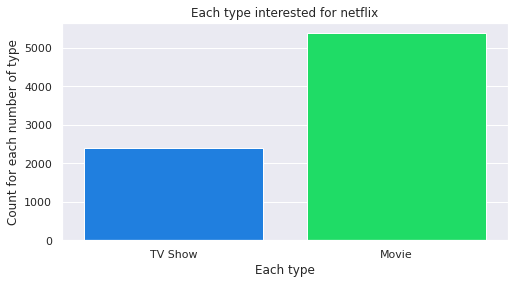

In [ ]:
# Ploting count plot for type column

plt.figure(figsize = (8, 4))

sns.countplot(data['type'])

plt.title('Each type interested for netflix')

plt.xlabel('Each type')
plt.ylabel('Count for each number of type')

plt.show()

In this graph we are seeing that the Movies interested is high on Netflix rather than TV shows.

###**Year column**

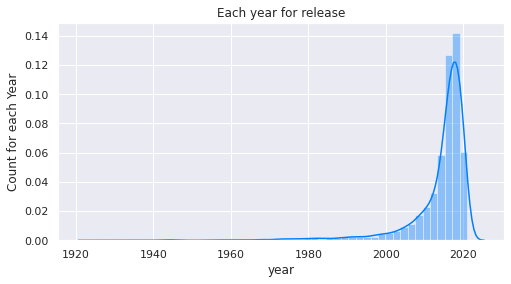

In [ ]:
# Getting the year column analysis
# Ploting Distribution plot for year 
plt.figure(figsize = (8, 4))

sns.distplot(data['release_year'])

plt.title('Each year for release')

plt.xlabel('year')
plt.ylabel('Count for each Year')

plt.show()

###**Release_year Column**

In [ ]:
# Getting the value count for each country using value_counts from pandas
data['release_year'].value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64